In [1]:
import kagglehub
import os

try:
    # ✅ Download dataset
    path = kagglehub.dataset_download("endofnight17j03/iris-classification")
    print("✅ Dataset downloaded to:", path)

    # 📁 List files in the directory
    files = os.listdir(path)
    print("📁 Files inside the dataset folder:", files)

    # 🔍 Look for a CSV file
    csv_files = [f for f in files if f.endswith('.csv')]
    if not csv_files:
        raise FileNotFoundError("No CSV file found in the downloaded dataset folder.")

    # 📄 Show path to the first CSV file found
    csv_path = os.path.join(path, csv_files[0])
    print("📄 Path to the first CSV file:", csv_path)

except Exception as e:
    print("❌ An error occurred:", e)

finally:
    print("✅ Final: Script execution completed.")


100%|██████████| 0.99k/0.99k [00:00<00:00, 1.24MB/s]

Extracting files...
✅ Dataset downloaded to: /root/.cache/kagglehub/datasets/endofnight17j03/iris-classification/versions/1
📁 Files inside the dataset folder: ['IRIS.csv']
📄 Path to the first CSV file: /root/.cache/kagglehub/datasets/endofnight17j03/iris-classification/versions/1/IRIS.csv
✅ Final: Script execution completed.


In [2]:
#Importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
%matplotlib inline
pd.set_option('display.max_columns',30)

In [3]:
df=pd.read_csv(csv_path)
print(df.shape)

(150, 5)


In [4]:
df2 = df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
68,6.2,2.2,4.5,1.5,Iris-versicolor
6,4.6,3.4,1.4,0.3,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
112,6.8,3.0,5.5,2.1,Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa
22,4.6,3.6,1.0,0.2,Iris-setosa
127,6.1,3.0,4.9,1.8,Iris-virginica
9,4.9,3.1,1.5,0.1,Iris-setosa


In [7]:
df.isnull().sum().sort_values(ascending=True)

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [8]:
df.duplicated().sum()

np.int64(3)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


*No need for cleanning the Data the Data already cleaned. Hence,we skip the step*

In [10]:
# extracting Numerical column and object column
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']
print(f'The categorical columns are : \n {cat_cols}')
print(f'The numerical columns are : \n {num_cols}')

The categorical columns are : 
 ['species']
The numerical columns are : 
 ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


In [11]:
print(len(cat_cols))
print(len(num_cols))

1
4


In [12]:
#unique values in categorical columns
for col in cat_cols:
  print(f"\n ♦️ {col} (Unique_Values : {df[col].nunique()})")
  print(df[col].value_counts(), "\n" + "-"*40)


 ♦️ species (Unique_Values : 3)
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64 
----------------------------------------


In [13]:
def identify_numeric_binary_and_multiclass_columns(df, max_unique_for_multiclass=10):
    binary_cols = []
    multiclass_cols = []

    # Select only numeric columns
    numeric_df = df.select_dtypes(include='number')

    for col in numeric_df.columns:
        unique_vals = numeric_df[col].nunique()

        if unique_vals == 2:
            binary_cols.append(col)
        elif 3 <= unique_vals <= max_unique_for_multiclass:
            multiclass_cols.append(col)

    return binary_cols, multiclass_cols

In [14]:
binary_cols, multiclass_cols = identify_numeric_binary_and_multiclass_columns(df)

print("🔢 Binary Numeric Columns:")
print(binary_cols)

print("\n🔢 Multiclass Numeric Columns:")
print(multiclass_cols)

🔢 Binary Numeric Columns:
[]

🔢 Multiclass Numeric Columns:
[]


**EXPLORATORY DATA ANALYSIS[EDA]**

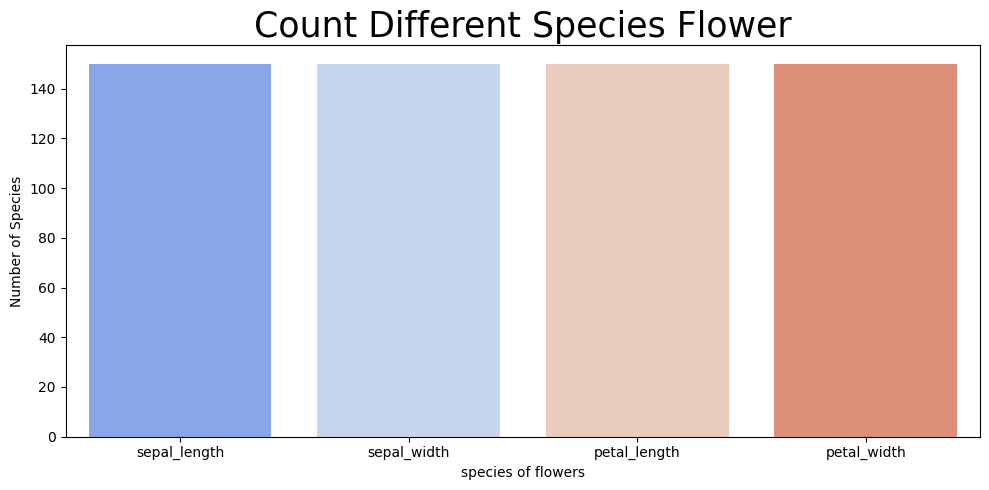

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,palette='coolwarm')
plt.title('Count Different Species Flower',size=25)
plt.xlabel('species of flowers')
plt.ylabel('Number of Species')
plt.tight_layout()
plt.show()

<Figure size 2000x500 with 0 Axes>

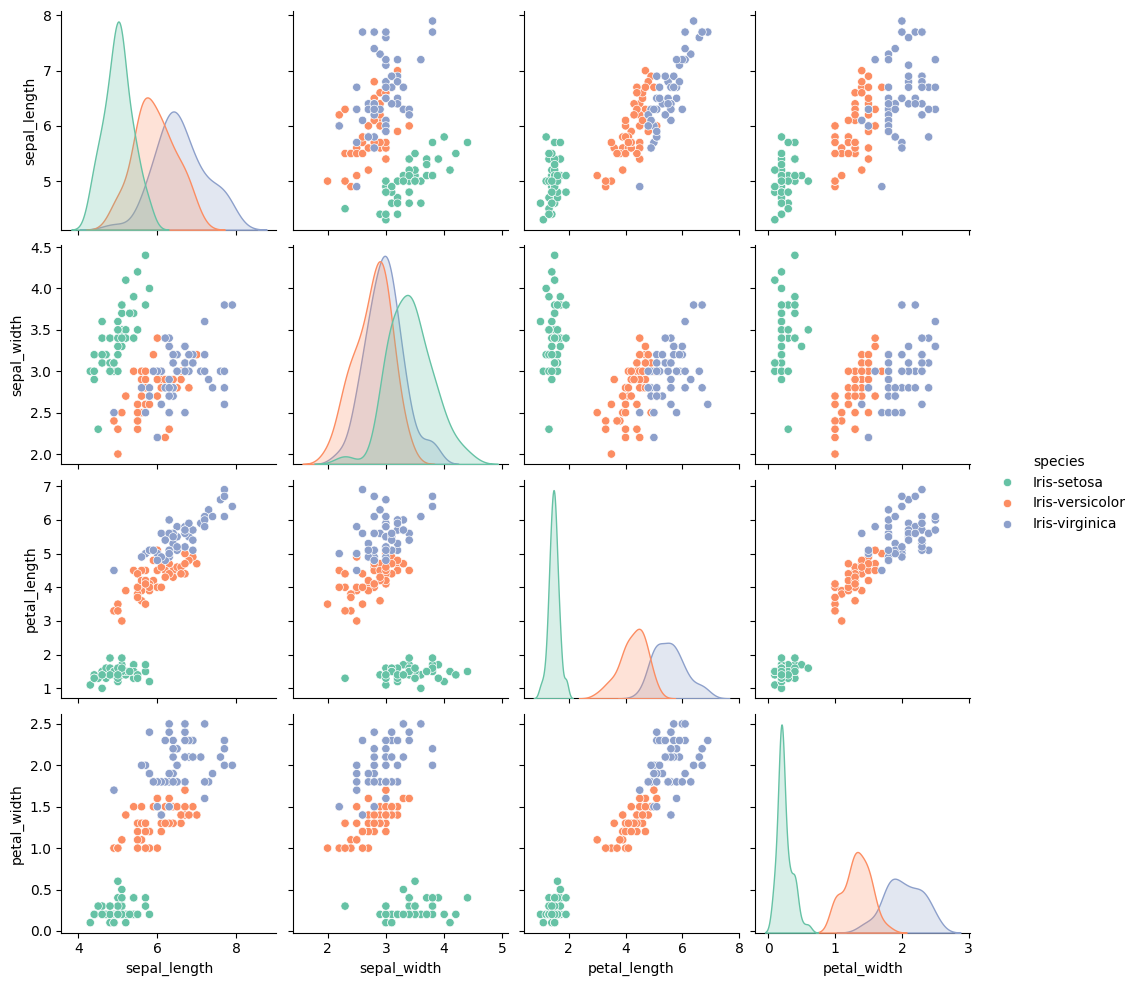

In [16]:
plt.figure(figsize=(20,5))
sns.pairplot(data=df,hue='species',palette='Set2')


In [17]:
fig = px.box(df, x='species', y='sepal_length', title='Sepal Length Distribution by Species')
fig.show()


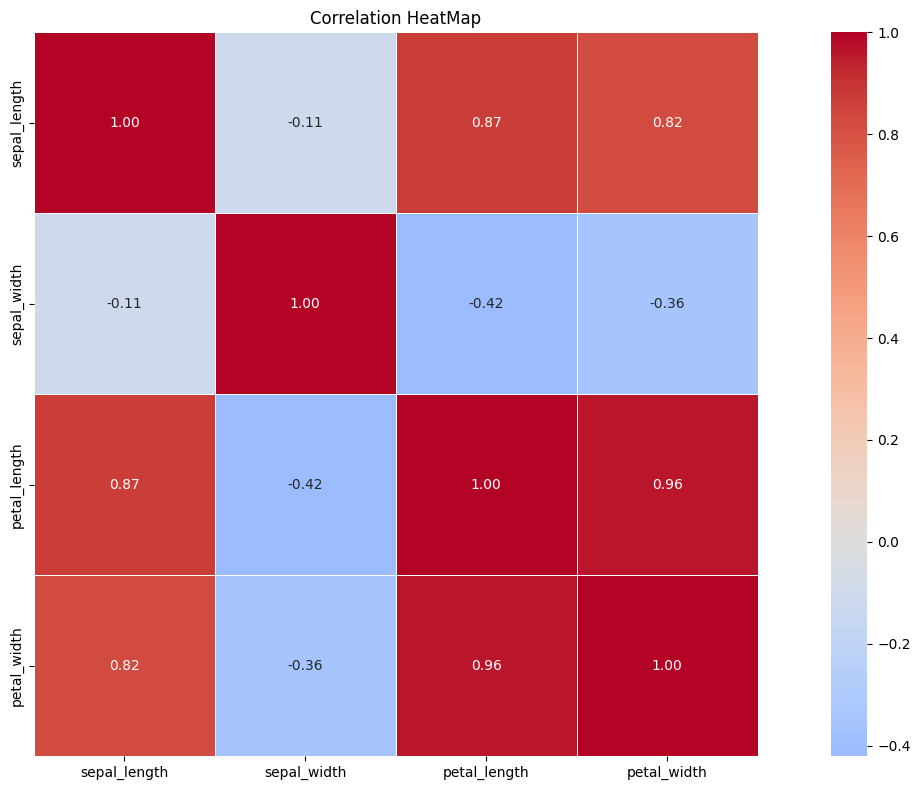

In [18]:
corr_matrix=df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',center=0,fmt='.2f',square=True,linewidths=0.5)

plt.title('Correlation HeatMap')
plt.tight_layout()
plt.show()

**Feature Engeering**

In [19]:


x= df.drop(columns='species',axis=1)
y= df['species']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)

print(x)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


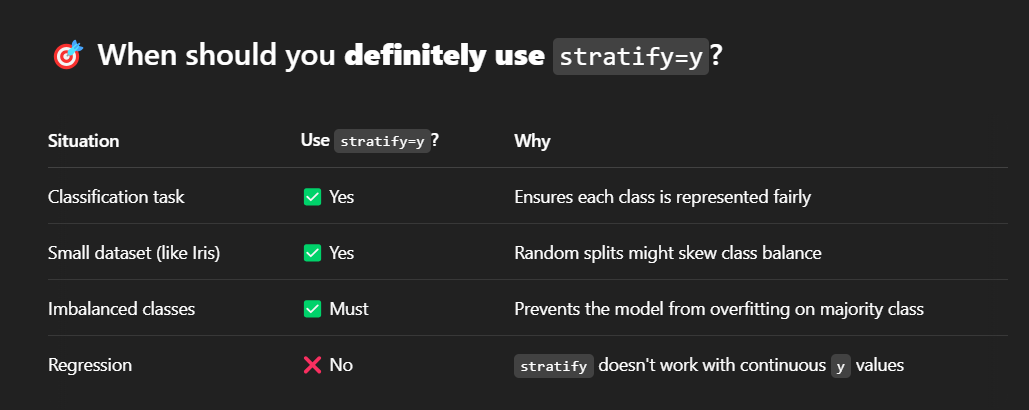

In [20]:
x.shape

(150, 4)

In [21]:
print(y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object


In [22]:
x_train.shape

(120, 4)

In [23]:
x_test.shape

(30, 4)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)
x_train_scale

array([[-1.72156775, -0.32483982, -1.34703555, -1.32016847],
       [-1.12449223, -1.22612948,  0.41429037,  0.65186742],
       [ 1.14439475, -0.55016223,  0.58474127,  0.25746024],
       [-1.12449223,  0.12580502, -1.29021859, -1.45163753],
       [-0.40800161, -1.22612948,  0.13020555,  0.12599118],
       [ 0.54731923, -1.22612948,  0.6983752 ,  0.91480554],
       [-0.2885865 , -0.77548465,  0.24383948,  0.12599118],
       [ 0.54731923, -0.55016223,  0.75519216,  0.3889293 ],
       [ 2.21913069, -0.0995174 ,  1.32336182,  1.44068178],
       [ 2.21913069,  1.70306192,  1.66426361,  1.30921272],
       [ 2.09971558, -0.0995174 ,  1.60744665,  1.17774366],
       [ 0.18907392, -0.32483982,  0.41429037,  0.3889293 ],
       [-1.00507713, -2.35274155, -0.15387928, -0.268416  ],
       [-0.04975629, -0.77548465,  0.18702251, -0.268416  ],
       [-0.04975629, -1.00080706,  0.13020555, -0.00547788],
       [-1.36332244,  0.35112743, -1.23340162, -1.32016847],
       [-0.88566202,  1.

**Model 1: Support Vector Machine Algorithm**

In [25]:
from sklearn.svm import SVC

model_svc = SVC()
model_svc.fit(x_train_scale,y_train)

yprediction_1 = model_svc.predict(x_test_scale)
from sklearn.metrics import accuracy_score

print(f'The accuracy score is:\n{accuracy_score(y_test, yprediction_1):.2%}')



The accuracy score is:
96.67%


**Model 2: Logistic Regression**

In [26]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression()
model_LR.fit(x_train_scale,y_train)

prediction_2 = model_LR.predict(x_test_scale)
from sklearn.metrics import accuracy_score

print(f'The accuracy score is:\n{accuracy_score(y_test, prediction_2):.2%}')



The accuracy score is:
93.33%


**Model 3: DecisionTreeClassifier**

In [27]:
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier()
model_DT.fit(x_train_scale,y_train)

prediction_3 = model_DT.predict(x_test_scale)
from sklearn.metrics import accuracy_score

print(f'The accuracy score is:\n{accuracy_score(y_test, prediction_3):.2%}')

The accuracy score is:
90.00%


In [29]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Assume df2 is your dataset

# Step 1: Label encode the target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df2['species'])

# Step 2: One-hot encode the target
y2 = to_categorical(y_encoded)

# Step 3: Separate features and target
x2 = df2.drop(columns='species', axis=1)

# Step 4: Train-test split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, stratify=y_encoded, test_size=0.2, random_state=42)

# Step 5: Feature scaling (after train-test split!)
scaler = StandardScaler()
x_train_scale2 = scaler.fit_transform(x_train2)
x_test_scale2 = scaler.transform(x_test2)

# Now x_train_scale2, x_test_scale2, y_train2, y_test2 are ready for your Neural Network!


In [35]:
# Step 1: Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train_scale2.shape[1],)),
    Dense(32, activation='relu'),
    Dense(y_train2.shape[1], activation='softmax')   # Softmax because multi-class classification
])

In [45]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,499 (29.30 KB)

 Trainable params: 2,499 (9.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,000 (19.54 KB)

In [36]:
# Step 2: Compile the model
model.compile(
    loss='categorical_crossentropy',  # small 'c'! not 'Categorical_crossentropy'
    optimizer='adam',                 # small 'a'! not 'Adam'
    metrics=['accuracy']
)

In [37]:
# Step 3: Convert x_train_scale2 to float32 (best for TensorFlow)
x_train_scale2 = x_train_scale2.astype(np.float32)

In [38]:
# Step 4: Train the model
history = model.fit(
    x_train_scale2,
    y_train2,
    epochs=100,
    validation_split=0.2
)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.4349 - loss: 1.0441 - val_accuracy: 0.6667 - val_loss: 0.9745
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6289 - loss: 0.9757 - val_accuracy: 0.8750 - val_loss: 0.9269
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8542 - loss: 0.9117 - val_accuracy: 0.8333 - val_loss: 0.8836
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8659 - loss: 0.8643 - val_accuracy: 0.7917 - val_loss: 0.8447
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8711 - loss: 0.8066 - val_accuracy: 0.7083 - val_loss: 0.8099
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8359 - loss: 0.7825 - val_accuracy: 0.7083 - val_loss: 0.7767
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8750 - loss: 0.7343 - val_accuracy: 0.7083 - val_loss: 0.7431
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8607 - loss: 0.6916 - val_accuracy: 0.7083 - val_loss

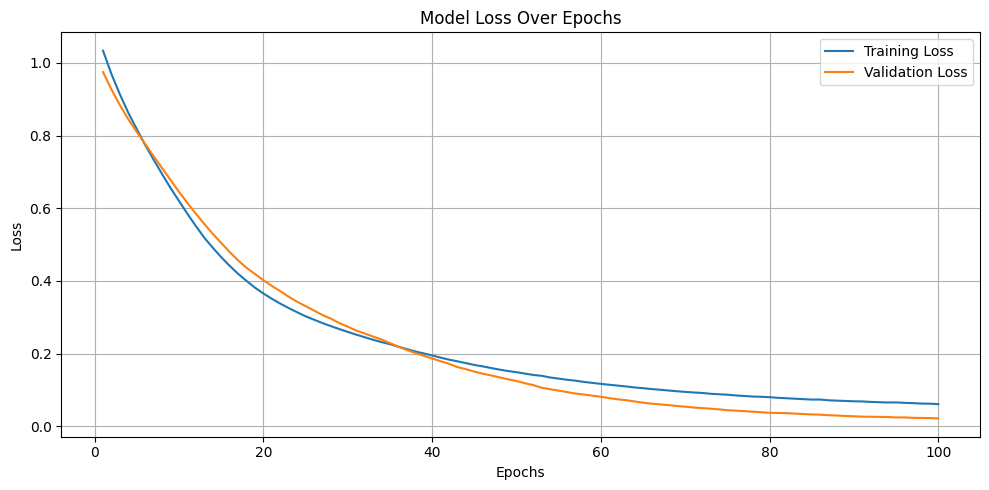

In [39]:
# Create a plot for training and validation loss
plt.figure(figsize=(10, 5))

# Plot the training loss
sns.lineplot(x=range(1, len(history.history['loss']) + 1), y=history.history['loss'], label='Training Loss')

# Plot the validation loss
sns.lineplot(x=range(1, len(history.history['val_loss']) + 1), y=history.history['val_loss'], label='Validation Loss')

# Titles and labels
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Add legend
plt.legend()

# Optional: Add grid
plt.grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

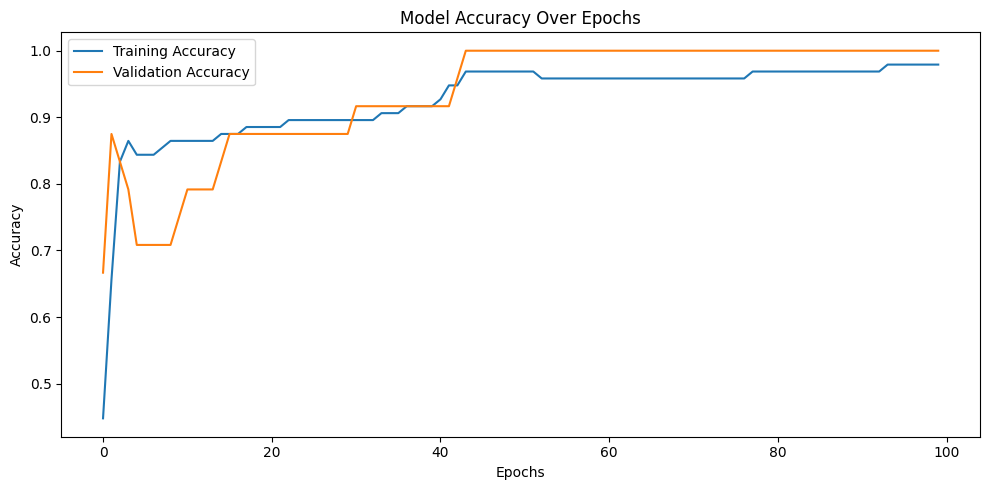

In [41]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=history.history['accuracy'], label='Training Accuracy')
sns.lineplot(data=history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
#plt.grid(True)
plt.tight_layout()
plt.show()

In [42]:
model.layers[2].get_weights()

[array([[ 0.04898789,  0.38199595,  0.06204737],
        [ 0.06296375, -0.17330033,  0.08698821],
        [-0.18902723, -0.01213058,  0.18897776],
        [-0.14011827, -0.36971104, -0.34705526],
        [ 0.14243369, -0.02344036, -0.0687942 ],
        [ 0.21210903, -0.46357694, -0.43900558],
        [-0.46061423,  0.20866503, -0.37777942],
        [ 0.10570852,  0.10142725, -0.46736425],
        [-0.30859196,  0.3627727 ,  0.08859693],
        [-0.52925974,  0.48967838, -0.43709195],
        [-0.28723067, -0.26445162,  0.4860567 ],
        [-0.01005263, -0.45143878, -0.35670048],
        [ 0.15434118, -0.49926782,  0.56875134],
        [ 0.266424  ,  0.33106107,  0.00381283],
        [-0.18102798, -0.35035717,  0.43601808],
        [-0.36509305, -0.52470845,  0.5454594 ],
        [-0.20086089,  0.4564308 , -0.3696855 ],
        [ 0.42299023, -0.2848382 , -0.09601872],
        [-0.09746145,  0.26299134, -0.27482617],
        [ 0.37133166, -0.22695953,  0.12682883],
        [-0.02085218

*estimated weights and bias of the 2nd layer*

In [43]:
# Step 1: Predict probabilities
y_log = model.predict(x_test_scale2)

# Step 2: Pick the class with highest probability
y_pred = np.argmax(y_log, axis=1)

# Now y_pred contains the predicted class labels (0, 1, 2) for each sample


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


In [44]:
from sklearn.metrics import accuracy_score
import numpy as np

# Step 1: Convert y_test2 (one-hot) back to normal labels
y_true = np.argmax(y_test2, axis=1)

# Step 2: Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 93.33%
